## Individual-level Predictions

In [17]:
TrainData210 = pd.read_csv('TrainData210.csv')
TrainData210.columns

Index(['GameID', 'Ha', 'pHa', 'La', 'lot_shape__A', 'lot_shape_symm_A',
       'lot_shape_L_A', 'lot_shape_R_A', 'LotNumA', 'Hb', 'pHb', 'Lb',
       'lot_shape__A.1', 'lot_shape_symm_A.1', 'lot_shape_L_A.1',
       'lot_shape_R_A.1', 'LotNumB', 'Amb', 'Corr', 'diffEV', 'diffSDs',
       'diffMins', 'diffMaxs', 'diffUV', 'RatioMin', 'SignMax',
       'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_Sign1',
       'pBbet_SignFB', 'Dom', 'diffBEV0', 'diffBEVfb', 'diffSignEV',
       'BEASTpred', 'block', 'Feedback', 'B_rate'],
      dtype='object')

In [26]:
psychological_features = pd.DataFrame(TrainData210[['GameID', 'diffEV', 'diffSDs',
       'diffMins', 'diffMaxs', 'diffUV', 'RatioMin', 'SignMax',
       'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_Sign1',
       'pBbet_SignFB', 'Dom', 'diffBEV0', 'diffBEVfb', 'diffSignEV']])
psychological_features = psychological_features.drop_duplicates()
psychological_features.head()

,GameID,diffEV,diffSDs,diffMins,diffMaxs,diffUV,RatioMin,SignMax,pBbet_Unbiased1,pBbet_UnbiasedFB,pBbet_Uniform,pBbet_Sign1,pBbet_SignFB,Dom,diffBEV0,diffBEVfb,diffSignEV
0,1,0.20,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.20,0.20,-0.8
5,2,0.05,0.300962,0,1,0.5,1.00,1,0.1477,-0.0077,0.4997,-0.0514,-0.0567,0,0.05,0.05,-0.2
10,3,0.00,1.000000,-1,1,0.0,0.50,0,0.0026,0.0054,0.0026,0.5013,0.5027,0,0.00,0.00,1.0
15,4,0.00,1.000000,-1,1,0.0,0.00,1,0.0080,-0.0190,0.0080,-0.4960,-0.5095,0,0.00,0.00,-1.0
20,5,-0.20,1.600000,-1,3,1.0,0.75,0,-0.6044,-0.6046,0.0092,0.1978,0.1977,0,-0.20,-0.20,0.8


In [2]:
individual_raw = pd.read_csv("raw-comp-set-data-Track-2.csv")
individual_block_avgs = pd.read_csv("individualBlockAvgs.csv")
print('Raw data shape: ', individual_raw.shape)
print('Avg data shape: ', individual_block_avgs.shape)

Raw data shape:  (3750, 30)
Avg data shape:  (102150, 38)


In [27]:
individual_block_avgs.columns

Index(['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotShapeA', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotShapeB', 'LotNumB',
       'Amb', 'Corr', 'block', 'Feedback', 'Dom', 'diffUV', 'RatioMin',
       'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform',
       'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb', 'diffMins',
       'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs', 'B', 'BEAST_blkPred'],
      dtype='object')

In [3]:
print('Unique SubjID in raw data: ', individual_raw.SubjID.unique().shape)
print('Unique SubjID in avg data: ', individual_block_avgs.SubjID.unique().shape)

Unique SubjID in raw data:  (30,)
Unique SubjID in avg data:  (686,)


In [4]:
print('Rows/cols per SubjID in raw data: ', individual_raw[(individual_raw.SubjID == 60004)].shape)
print('Rows/cols per SubjID in avg data: ', individual_block_avgs[(individual_block_avgs.SubjID == 60004)].shape)

print('Unique GameID per SubjID in raw data: ', individual_raw[(individual_raw.SubjID == 60004)]['GameID'].unique().shape)
print('Unique GameID per SubjID in avg data: ', individual_block_avgs[(individual_block_avgs.SubjID == 60004)]['GameID'].unique().shape)

Rows/cols per SubjID in raw data:  (125, 30)
Rows/cols per SubjID in avg data:  (125, 38)
Unique GameID per SubjID in raw data:  (5,)
Unique GameID per SubjID in avg data:  (25,)


> Raw data includes the decision on each single game (B is either 0 or 1), but includes info from only 5 games. Avg data incldes the avg decision on each block (B is continous from 0 to 1) and includes the B rates from 25 games.

In [89]:
test = pd.DataFrame()
data = individual_block_avgs[['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotShapeA', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotShapeB', 'LotNumB',
       'Amb', 'Corr', 'block', 'Feedback', 'Dom', 'diffUV', 'RatioMin',
       'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform',
       'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb', 'diffMins',
       'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs', 'B', 'BEAST_blkPred']]
train = data
test_game = 6

In [93]:
subject_ids = data.SubjID.unique()
subject_idx = data.SubjID.values
for i in range(subject_ids.shape[0]):
    #print('i: {}'.format(i))
    game_ids = data.loc[data.SubjID == subject_ids[i]].GameID.unique()
    game2remove = np.random.choice(game_ids, test_game, replace=False)
    #print('game2remove: {}'.format(game2remove))
    for j in range(test_game):
        test = pd.concat([test, data.loc[((data['SubjID'] == subject_ids[i]) & (data['GameID'] == game2remove[j]))]])
        #print('test size: {}'.format(test.shape[0]))
        train.drop(train[(train['SubjID'] == subject_ids[i]) & (train['GameID'] == game2remove[j])].index, axis = 0, inplace=True)
        #print('train size: {}'.format(train.shape[0]))

In [95]:
mapping = {'Symm': 1, 'R-skew': 2, 'L-skew': 3, '-': 4, 'nan': 0}
train = train.replace({'LotShapeA': mapping, 'LotShapeB': mapping})
test = test.replace({'LotShapeA': mapping, 'LotShapeB': mapping})

In [96]:
mapping = {'F': 1, 'M': 0}
train = train.replace({'Gender': mapping})
test = test.replace({'Gender': mapping})

In [97]:
mapping = {'Technion': 1, 'Rehovot': 0}
train = train.replace({'Location': mapping})
test = test.replace({'Location': mapping})

### Function to evaluate performance

Taken from CPC18 source code.

In [33]:
# A function used to evaluate predictive performance
def my_evaluate(y, y_hat, do_MSE=True, do_cor=True, do_plot=True):
    rmse = None
    cor_yy = None
    if do_MSE:
        rmse = math.sqrt(mean_squared_error(y, y_hat))
        print('RMSE is {}'.format(rmse))

    if do_cor:
        cor_yy = pearsonr(y, y_hat)[0]
        print('correlation is {}'.format(cor_yy))

    if do_plot:
        fit = np.polyfit(y_hat, y, deg=1)
        plt.plot(y_hat, fit[0] * y_hat + fit[1], color='black')
        plt.scatter(y_hat, y, color='black')
        y = range(2)
        plt.plot(y, '--',color='red')
        plt.show()

    return rmse, cor_yy

In [34]:
# Transform outputs to be consistent with maximization (i.e., not minimization)
def pBpMaxTransform(orig_vec, is_b_max):
    orig_vec.name = 'B'
    new_vec = pd.concat([orig_vec, is_b_max], axis=1)
    new_vec.loc[new_vec['isBMax'] == False, 'B'] = 1 - new_vec['B']
    return new_vec['B']

### Naive Model

Taken from CPC18 track II baseline model code.

RMSE is 0.31720176793040944
correlation is 0.5396985293031049


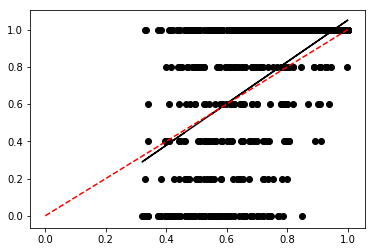

(0.31720176793040944, 0.5396985293031049)

In [35]:
is_b_max = individual_block_avgs['diffEV'] >= 0
is_b_max.name = 'isBMax'
individual_block_avgs['B'] = pBpMaxTransform(individual_block_avgs['B'], is_b_max)

    # keep only relevant data
data = individual_block_avgs[['SubjID', 'GameID', 'block', 'B']]
data = data.assign(isBMax = is_b_max.values)
   # data['isBMax'] = is_b_max.values

    # split data to train_data and test #
new_data = data.loc[data.SubjID >= 60000]
train_data, test_data = splitLongData(new_data, seed=1)
train_data = pd.concat([train_data, data.loc[data.SubjID < 60000]], ignore_index=True)

########################
# Naive baseline: avgs #
########################
avg_bin_train = train_data.groupby(['GameID', 'block']).mean()['B'].reset_index()
test_with_preds = test_data.merge(avg_bin_train, on=['GameID', 'block'])
my_evaluate(pBpMaxTransform(test_with_preds['B_x'], test_with_preds['isBMax']),
            pBpMaxTransform(test_with_preds['B_y'], test_with_preds['isBMax']))

### Fixed effects
Aka linear models with controls for group variables, block number in this case.

### 1. First approach to FE

In [71]:
train.columns

Index(['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotShapeA', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotShapeB', 'LotNumB',
       'Amb', 'Corr', 'block', 'Feedback', 'Dom', 'diffUV', 'RatioMin',
       'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform',
       'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb', 'diffMins',
       'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs', 'B', 'BEAST_blkPred'],
      dtype='object')

In [98]:
# normalize the data attributes
min_max_scaler = preprocessing.MinMaxScaler()

train_norm_2 = min_max_scaler.fit_transform(train)
test_norm_2 = min_max_scaler.fit_transform(test)

In [105]:
train_norm_2 = pd.DataFrame(train_norm_2)
test_norm_2 = pd.DataFrame(test_norm_2)

In [106]:
train_norm_2.columns = ['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotShapeA', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotShapeB', 'LotNumB',
       'Amb', 'Corr', 'block', 'Feedback', 'Dom', 'diffUV', 'RatioMin',
       'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform',
       'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb', 'diffMins',
       'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs', 'B', 'BEAST_blkPred']

test_norm_2.columns = ['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotShapeA', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotShapeB', 'LotNumB',
       'Amb', 'Corr', 'block', 'Feedback', 'Dom', 'diffUV', 'RatioMin',
       'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB', 'pBbet_Uniform',
       'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb', 'diffMins',
       'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs', 'B', 'BEAST_blkPred']

In [107]:
train_norm_2.head(2)

,SubjID,Location,Gender,Age,Order,GameID,Ha,pHa,La,LotShapeA,...,pBbet_SignFB,diffBEV0,diffBEVfb,diffMins,diffSignEV,diffEV,diffMaxs,diffSDs,B,BEAST_blkPred
0,0.834844,1.0,1.0,0.315789,0.0,0.822967,0.814159,0.494949,0.181818,0.0,...,0.74975,0.633456,0.454545,1.0,0.912814,0.416404,0.156164,0.0,0.8,0.605
1,0.818617,0.0,1.0,0.315789,0.0,0.822967,0.814159,0.494949,0.181818,0.0,...,0.74975,0.633456,0.454545,1.0,0.912814,0.416404,0.156164,0.0,0.6,0.605


In [108]:
import statsmodels.formula.api as smf
linear_1 = smf.ols('B ~  + C(Gender) + Age + Ha + pHa + La + LotNumA + pHb + Lb + C(LotShapeB) + C(Amb) + C(Corr) + C(Feedback) + C(Dom) + RatioMin + SignMax + pBbet_Unbiased1 + pBbet_UnbiasedFB + pBbet_Uniform + pBbet_Sign1 + pBbet_SignFB + diffBEV0 + diffBEVfb + diffMins + diffSignEV + diffEV + diffMaxs + diffSDs + C(block)', 
        train_norm_2).fit()


In [109]:
linear_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:13:45   Log-Likelihood:                -30634.
No. Observations:               81570   AIC:                         6.134e+04
Df Residuals:                   81535   BIC:                         6.166e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1.006e+08   2.11e+07     -4.776      0.000   -1.42e+08   -5.93e+07
C(Gender)[T.1.0]                       0.0008      0.003      0.297      0.767      -0.004       0.006
C(LotShapeB)[T.0.3333333333333333]    -0.0161      0.007     -2.451      0.014      -0.029      -0.003
C(LotShapeB)[T.0.6666666666666667]    -0.0176      0.006     -3.137      0.002      -0.029      -0.007
C(LotShapeB)[T.1.0]                   -0.0081      0.004     -2.175      0.030      -0.015      -0.001
C(Amb)[T.1.0]                          0.0857      0.005     17.452      0.000       0.076       0.095
C(Corr)[T.0.5]                        -0.0032      0.007     -0.459      0.646      -0.017       0.010
C(Corr)[T.1.0]                        -0.0073      0.010     -0.715      0.474      -0.027       0.013
C(Feedback)[T.1.0]                    24.0860      5.041      4.778      0.000      14.206      33.966
C(Dom)[T.0.5]                          0.1189      0.008     14.901      0.000       0.103       0.134
C(Dom)[T.1.0]                          0.2894      0.012     23.807      0.000       0.266       0.313
C(block)[T.0.25]                     -24.0688      5.041     -4.775      0.000     -33.949     -14.189
C(block)[T.0.5]                      -24.0690      5.041     -4.775      0.000     -33.949     -14.189
C(block)[T.0.75]                     -24.0789      5.041     -4.777      0.000     -33.959     -14.199
C(block)[T.1.0]                      -24.0837      5.041     -4.778      0.000     -33.964     -14.204
Age                                    0.0147      0.008      1.763      0.078      -0.002       0.031
Ha                                     0.0660      0.010      6.446      0.000       0.046       0.086
pHa                                   -0.0011      0.006     -0.186      0.852      -0.012       0.010
La                                     0.1049      0.025      4.174      0.000       0.056       0.154
LotNumA                               -0.0321      0.007     -4.489      0.000      -0.046      -0.018
pHb                                   -0.0291      0.006     -5.269      0.000      -0.040      -0.018
Lb                                    -0.1573      0.027     -5.785      0.000      -0.211      -0.104
RatioMin                               0.0689      0.005     15.163      0.000       0.060       0.078
SignMax                               -0.0143      0.009     -1.671      0.095      -0.031       0.002
pBbet_Unbiased1                       -0.1901      0.029     -6.465      0.000      -0.248      -0.132
pBbet_UnbiasedFB                       0.4495      0.029     15.735      0.000       0.394       0.505
pBbet_Uniform                          0.1613      0.009     17.194      0.000       0.143      

RMSE is 0.34990219567730746
correlation is 0.5681501589781555


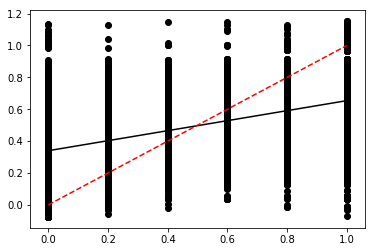

(0.34990219567730746, 0.5681501589781555)

In [110]:
y_test_ = test_norm_2['B']
y_pred_1 = linear_1.predict(test_norm_2)
my_evaluate(y_pred_1, y_test_)

### 2. Linear regression

In [111]:
train_ =  pd.get_dummies(train)
test_ =  pd.get_dummies(test)

In [112]:
train_.columns

Index(['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotNumB', 'Amb', 'Corr', 'block',
       'Feedback', 'Dom', 'diffUV', 'RatioMin', 'SignMax', 'pBbet_Unbiased1',
       'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_Sign1', 'pBbet_SignFB',
       'diffBEV0', 'diffBEVfb', 'diffMins', 'diffSignEV', 'diffEV', 'diffMaxs',
       'diffSDs', 'B', 'BEAST_blkPred', 'LotShapeA_1', 'LotShapeA_2',
       'LotShapeA_3', 'LotShapeA_4', 'LotShapeB_1', 'LotShapeB_2',
       'LotShapeB_3', 'LotShapeB_4'],
      dtype='object')

In [113]:
# normalize the data attributes
min_max_scaler = preprocessing.MinMaxScaler()

test_norm_1 = min_max_scaler.fit_transform(test_)
train_norm_1 = min_max_scaler.fit_transform(train_)

In [114]:
train_norm_1 = pd.DataFrame(test_norm_1)
test_norm_1 = pd.DataFrame(train_norm_1)

In [122]:
train_norm_1.columns = ['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotNumB', 'Amb', 'Corr', 'block',
       'Feedback', 'Dom', 'diffUV', 'RatioMin', 'SignMax', 'pBbet_Unbiased1',
       'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_Sign1', 'pBbet_SignFB',
       'diffBEV0', 'diffBEVfb', 'diffMins', 'diffSignEV', 'diffEV', 'diffMaxs',
       'diffSDs', 'B', 'BEAST_blkPred', 'LotShapeA_1', 'LotShapeA_2',
       'LotShapeA_3', 'LotShapeA_4', 'LotShapeB_1', 'LotShapeB_2',
       'LotShapeB_3', 'LotShapeB_4']

test_norm_1.columns = ['SubjID', 'Location', 'Gender', 'Age', 'Order', 'GameID', 'Ha', 'pHa',
       'La', 'LotNumA', 'Hb', 'pHb', 'Lb', 'LotNumB', 'Amb', 'Corr', 'block',
       'Feedback', 'Dom', 'diffUV', 'RatioMin', 'SignMax', 'pBbet_Unbiased1',
       'pBbet_UnbiasedFB', 'pBbet_Uniform', 'pBbet_Sign1', 'pBbet_SignFB',
       'diffBEV0', 'diffBEVfb', 'diffMins', 'diffSignEV', 'diffEV', 'diffMaxs',
       'diffSDs', 'B', 'BEAST_blkPred', 'LotShapeA_1', 'LotShapeA_2',
       'LotShapeA_3', 'LotShapeA_4', 'LotShapeB_1', 'LotShapeB_2',
       'LotShapeB_3', 'LotShapeB_4']

In [147]:
X_train = train_norm_1.drop(['SubjID', 'GameID','B'], axis=1)
y_train = train_norm_1['B']
X_test = test_norm_1.drop(['SubjID', 'GameID','B'], axis=1)
y_test = test_norm_1['B']

In [124]:
from sklearn import linear_model
reg_model = linear_model.LinearRegression(normalize=True)
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

RMSE is 0.34104504684775216
correlation is 0.597004265247271


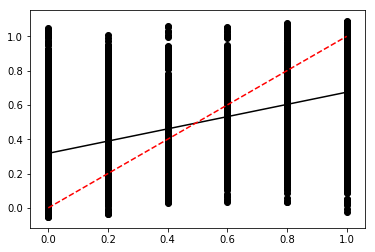

(0.34104504684775216, 0.597004265247271)

In [125]:
y_pred_2 = reg_model.predict(X_test)
my_evaluate(y_pred_2, y_test)

### Mixed Effects

In [126]:
import statsmodels.formula.api as smf

md = smf.mixedlm('B ~  + C(Gender) + Age + Ha + pHa + La + C(LotShapeA) + C(LotNumA) + Hb + pHb + Lb + C(LotShapeB) + C(LotNumB) + C(Amb) + C(Corr) + C(Feedback) + C(Dom) + pBbet_Unbiased1 + diffBEVfb + diffEV + BEAST_blkPred', 
                 train_norm_2, groups=train['block']).fit()

/Users/anabelen/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


RMSE is 0.3421323777640609
correlation is 0.5939546728179642


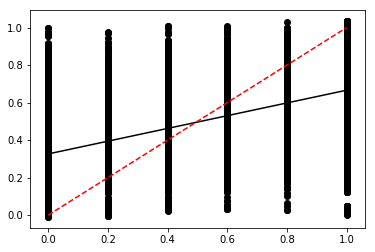

(0.3421323777640609, 0.5939546728179642)

In [127]:
y_pred_3 = md.predict(test_norm_2)
my_evaluate(y_pred_3, y_test_)

### Random Forest

/Users/anabelen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE is 0.3232307742571973
correlation is 0.6504854017186078


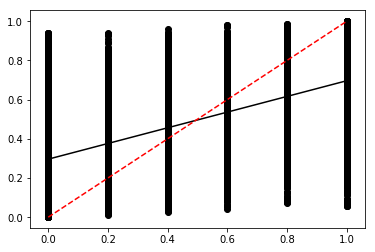

(0.3232307742571973, 0.6504854017186078)

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=160, max_features=0.22, min_samples_leaf=55)
rf_model.fit(X_train, y_train)

# let the trained RF predict the prediction prbolem
y_pred_4 = rf_model.predict(X_test)
my_evaluate(y_pred_4, y_test)

In [150]:
X_train.columns

Index(['Location', 'Gender', 'Age', 'Order', 'Ha', 'pHa', 'La', 'LotNumA',
       'Hb', 'pHb', 'Lb', 'LotNumB', 'Amb', 'Corr', 'block', 'Feedback', 'Dom',
       'diffUV', 'RatioMin', 'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB',
       'pBbet_Uniform', 'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb',
       'diffMins', 'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs',
       'BEAST_blkPred', 'LotShapeA_1', 'LotShapeA_2', 'LotShapeA_3',
       'LotShapeA_4', 'LotShapeB_1', 'LotShapeB_2', 'LotShapeB_3',
       'LotShapeB_4'],
      dtype='object')

Feature ranking:
1. feature 32 (0.277551)
2. feature 29 (0.113009)
3. feature 26 (0.112359)
4. feature 25 (0.097781)
5. feature 20 (0.070514)


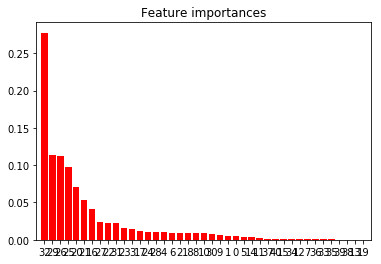

In [160]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [145]:
X_train.columns

Index(['Location', 'Gender', 'Age', 'Order', 'Ha', 'pHa', 'La', 'LotNumA',
       'Hb', 'pHb', 'Lb', 'LotNumB', 'Amb', 'Corr', 'block', 'Feedback', 'Dom',
       'diffUV', 'RatioMin', 'SignMax', 'pBbet_Unbiased1', 'pBbet_UnbiasedFB',
       'pBbet_Uniform', 'pBbet_Sign1', 'pBbet_SignFB', 'diffBEV0', 'diffBEVfb',
       'diffMins', 'diffSignEV', 'diffEV', 'diffMaxs', 'diffSDs',
       'BEAST_blkPred', 'LotShapeA_1', 'LotShapeA_2', 'LotShapeA_3',
       'LotShapeA_4', 'LotShapeB_1', 'LotShapeB_2', 'LotShapeB_3',
       'LotShapeB_4'],
      dtype='object')

### XGBoost

/Users/anabelen/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anabelen/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE is 0.31444711217989674
correlation is 0.6738046664900851


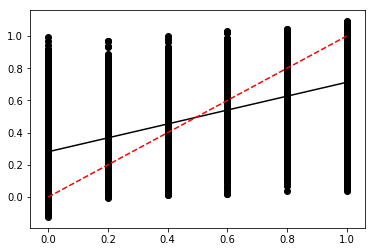

(0.31444711217989674, 0.6738046664900851)

In [154]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=1000, colsample_bytree=0.4, subsample=0.2)
xg_model.fit(X_train,y_train)
y_pred_5 = xg_model.predict(X_test)
my_evaluate(y_pred_5, y_test)

Feature ranking:
1. feature 16 (0.087954)
2. feature 29 (0.086892)
3. feature 25 (0.061437)
4. feature 26 (0.059166)
5. feature 32 (0.052807)


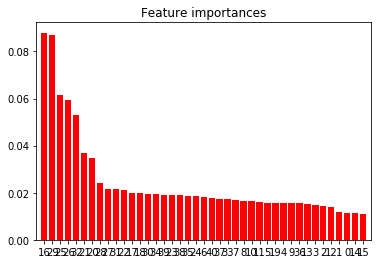

In [159]:
importances = xg_model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in xg_model.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()